# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

## try to install these extensions for working
!pip install -U bottleneck
!pip install pyarrow
!pip install geopandas

In [2]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.3.0
matplotlib version: 3.7.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Need to install for the working file !pip install pyarrow   
!pip install pyarrow

# Try loading one file
parquet_file = r'C:\Documents\NYC_TAXI_EDA\Datasets and Dictionary\trip_records\2023-1.parquet'

# df = pd.read_parquet('2023-1.parquet')
import pyarrow.parquet as pq

# Provide the Path to the file
parquet_path = r'C:\NYC\NYC_TAXI_EDA\Datasets and Dictionary\trip_records\2023-1.parquet'

# Used ParquetFile to read batches of it
try:
    parquet_file = pq.ParquetFile(parquet_path)
    print(" Metadata read successfully.")
    
    # Try to Read only first 100,000 rows as a sample
    df = parquet_file.read_row_groups([0], columns=None).to_pandas()
    
    print("successfully sample batch loaded!")
    print(df.shape)
    display(df.head())
    
except Exception as e:
    print(f" Failed to read file: {e}")
    
# df.info()
df.info()

 Metadata read successfully.
successfully sample batch loaded!
(1048576, 19)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

<class 'pandas.core.frame.DataFrame'>
Index: 1048576 entries, 0 to 1057604
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1048576 non-null  int64         
 1   tpep_pickup_datetime   1048576 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1048576 non-null  datetime64[us]
 3   passenger_count        1048576 non-null  float64       
 4   trip_distance          1048576 non-null  float64       
 5   RatecodeID             1048576 non-null  float64       
 6   store_and_fwd_flag     1048576 non-null  object        
 7   PULocationID           1048576 non-null  int64         
 8   DOLocationID           1048576 non-null  int64         
 9   payment_type           1048576 non-null  int64         
 10  fare_amount            1048576 non-null  float64       
 11  extra                  1048576 non-null  float64       
 12  mta_tax                1048576 no

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Set the folder having data files
os.chdir(r'C:\Documents\NYC_TAXI_EDA\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = [file for file in os.listdir() if file.endswith('.parquet')]

# initialise an empty DataFrame
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Processing {file_name}...")

        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        Monthly_data = pd.read_parquet(file_path)

        ## Now Convert to datetime and extract date/hour
        Monthly_data['tpep_pickup_datetime'] = pd.to_datetime(Monthly_data['tpep_pickup_datetime'])
        Monthly_data['pickup_date'] = Monthly_data['tpep_pickup_datetime'].dt.date
        Monthly_data['pickup_hour'] = Monthly_data['tpep_pickup_datetime'].dt.hour
        
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        
        
        # Loop through dates and then loop through every hour of each date
        
        # Iterate through each hour of the selected date


        # A. Loop through each date and hour
        for date in Monthly_data['pickup_date'].unique():
            day_data = Monthly_data[Monthly_data['pickup_date'] == date]

            for hour in range(24):
                hour_data = day_data[day_data['pickup_hour'] == hour]
                
                # Sample 5% of the hourly data randomly

                ### Done for Sample 1% of the data for that hour if not empty to get around 3.5 lakh data 
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.01, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
                    
                    # add data of this hour to the dataframe


        # Concatenate the sampled data of all the dates to a single dataframe
       # df = # we initialised this empty DF earli
        ## Now Append this month's sampled data to the main DataFrame
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f" Error reading file {file_name}: {e}")

#Finalise shape of the sampled DataFrame
print(f"\n The Shape of Final sampled: {df.shape}")

Processing 2023-1.parquet...
Processing 2023-10.parquet...
Processing 2023-11.parquet...
Processing 2023-12.parquet...
Processing 2023-2.parquet...
Processing 2023-3.parquet...
Processing 2023-4.parquet...
Processing 2023-5.parquet...
Processing 2023-6.parquet...
Processing 2023-7.parquet...
Processing 2023-8.parquet...
Processing 2023-9.parquet...

 The Shape of Final sampled: (379268, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet

df.to_csv('The _Final_sampled_nyc_taxi_data.csv', index=False)
print("successfully saved the sample data.")

# df.to_parquet('')

successfully saved the sample data.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file
df = pd.read_csv('The _Final_sampled_nyc_taxi_data.csv')

In [8]:
# df.head()
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2

In [12]:
# df.info()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               379268 non-null  int64  
 1   tpep_pickup_datetime   379268 non-null  object 
 2   tpep_dropoff_datetime  379268 non-null  object 
 3   passenger_count        366326 non-null  float64
 4   trip_distance          379268 non-null  float64
 5   RatecodeID             366326 non-null  float64
 6   store_and_fwd_flag     366326 non-null  object 
 7   PULocationID           379268 non-null  int64  
 8   DOLocationID           379268 non-null  int64  
 9   payment_type           379268 non-null  int64  
 10  fare_amount            379268 non-null  float64
 11  extra                  379268 non-null  float64
 12  mta_tax                379268 non-null  float64
 13  tip_amount             379268 non-null  float64
 14  tolls_amount           379268 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)

# The Examples of usually unnecessary columns: ('Unnamed: 0', 'index', 'ehail_fee', 'extra' if constant)

cols_to_drop = [col for col in df.columns if 'unnamed' in col.lower() or 'index' in col.lower()]
df.drop(columns=cols_to_drop, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [14]:
# Combine the two airport fee columns

### A.. Find all airport fee related columns
airport_cols = [col for col in df.columns if 'airport_fee' in col.lower()]
print("Airport Fee Columns:", airport_cols)

### B.. If two columns found, combine them

if len(airport_cols) == 2:
    df['airport_fee'] = df[airport_cols].sum(axis=1)
    df.drop(columns=airport_cols, inplace=True)
elif len(airport_cols) == 1:
    df.rename(columns={airport_cols[0]: 'airport_fee'}, inplace=True)

Airport Fee Columns: ['airport_fee', 'Airport_fee']


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative

### Checking for the negative fare amounts
neg_fare = df[df['fare_amount'] < 0]
print(f"Negative fare amounts: {len(neg_fare)}")

Negative fare amounts: 0


Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts

print(neg_fare['RatecodeID'].value_counts())

Series([], Name: count, dtype: int64)


In [17]:
# Find which columns have negative values

for col in ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']:
    if col in df.columns:
        print(f"{col} has {sum(df[col] < 0)} negative values")

fare_amount has 0 negative values
extra has 1 negative values
mta_tax has 15 negative values
tip_amount has 0 negative values
tolls_amount has 0 negative values
improvement_surcharge has 15 negative values
total_amount has 15 negative values


In [18]:
# fix these negative values
df = df[df['fare_amount'] >= 0]
df = df[df['total_amount'] >= 0]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [19]:
# Find the proportion of missing values in each column

Missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("The proportions of missing value is :\n", Missing_ratio)

The proportions of missing value is :
 passenger_count          0.034125
congestion_surcharge     0.034125
RatecodeID               0.034125
store_and_fwd_flag       0.034125
VendorID                 0.000000
mta_tax                  0.000000
pickup_date              0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
fare_amount              0.000000
extra                    0.000000
tpep_pickup_datetime     0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
pickup_hour              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [23]:
# Display the rows with null values

### A.. Print rows with missing passenger count

print(df[df['passenger_count'].isna()])

# Impute NaN values in 'passenger_count'

### B.. Replaceing the missing values in 'passenger_count' with the mode
mode_passengersA = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(mode_passengersA)

### C..Handling  rows with 0 passengers
Zero_passengers = df[df['passenger_count'] == 0]
print(f"Zero passenger count rows: {len(Zero_passengers)}")

### D..Replacing  0 with mode (It preferred if few zeros are present)
df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode_passengersA

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour]
Index: []
Zero passenger count rows: 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [24]:
# Fix missing values in 'RatecodeID'

### Swiping missing RatecodeID with mode
Mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(Mode_ratecode)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge

### A.. Filling the  missing congestion_surcharge values with 0 (default value)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values

### A.. Checking the  remaining NaNs
print(df.isnull().sum())

### B..Filling the  numeric NaNs with median, or drop if small present
df.dropna(inplace=True)

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       12942
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
pickup_date                  0
pickup_hour                  0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present

### A.. Introducing and identifying outliers
print(df.describe())

# Check for potential out of place values in various columns

### B..The different Examples of outliers present
print(df[df['trip_distance'] > 250])
print(df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)])
print(df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])])
print(df[df['payment_type'] == 0])

            VendorID  passenger_count  trip_distance     RatecodeID  \
count  366311.000000    366311.000000  366311.000000  366311.000000   
mean        1.737379         1.383087       3.485993       1.644649   
std         0.440059         0.875070      23.052220       7.461091   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.060000       1.000000   
50%         2.000000         1.000000       1.780000       1.000000   
75%         2.000000         1.000000       3.350000       1.000000   
max         2.000000         9.000000    9678.780000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  366311.000000  366311.000000  366311.000000  366311.000000   
mean      165.423684     164.255619       1.204457      20.092911   
std        63.702229      69.724697       0.465800     237.215118   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.0

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [24]:
# remove passenger_count > 6

df = df[df['passenger_count'] <= 6]

In [28]:
# Continue with outlier handling

### Droping down the unrealistic distances and fares
df = df[df['trip_distance'] <= 250]
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [29]:
# Do any columns need standardising?

### Removeing the payment_type = 0
df = df[df['payment_type'] != 0]

###  Saved the Cleaned Data
df.to_csv('The_cleaned_sampled_nyc_taxi_s.csv', index=False)
print(" Cleaned dataset saved successfully. Final shape:", df.shape)

 Cleaned dataset saved successfully. Final shape: (366294, 20)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [24]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

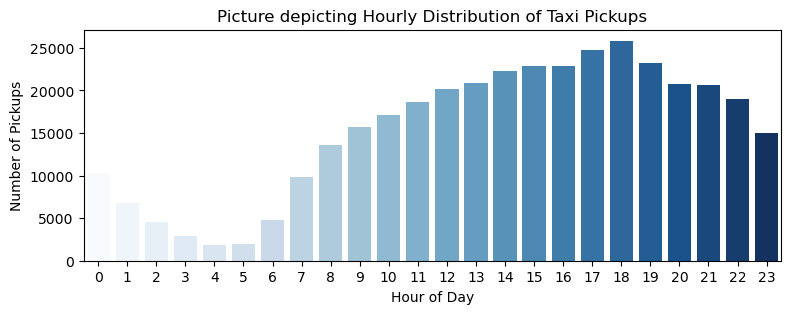

In [33]:
# Find and show the hourly trends in taxi pickups

### A.. Using Seaborn and Matplotlib for visualization

# Ensure tpep_pickup_datetime is in datetime format

# Now Convert pickup datetime if not already converted
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Create additional time-based columns
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.month_name()

### The Hourly Trend showing : Taxi pickups by hour of the day
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 3))
sns.countplot(data=df, x='pickup_hour', hue='pickup_hour', palette='Blues', legend=False)
plt.title('Picture depicting Hourly Distribution of Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

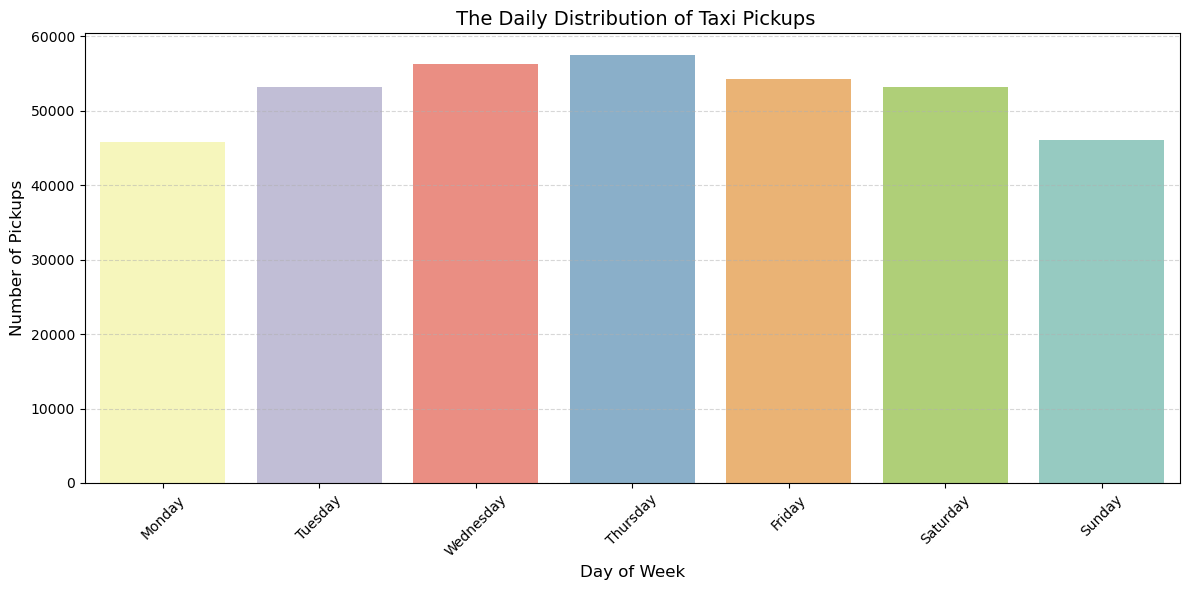

In [35]:
# Find and show the daily trends in taxi pickups (days of the week)

### A..  Daily Trend analysis :- Taxi pickups by day of the week

# First Define day order for correct weekday layout

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))

# Future-proof version using hue to apply palette
sns.countplot(
    data=df,
    x='pickup_day_name',
    hue='pickup_day_name',          
    order=days_order,
    palette='Set3',
    legend=False                    
)

# Now Add titles and labels
plt.title(' The Daily Distribution of Taxi Pickups', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)

# Now Grid and layout
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

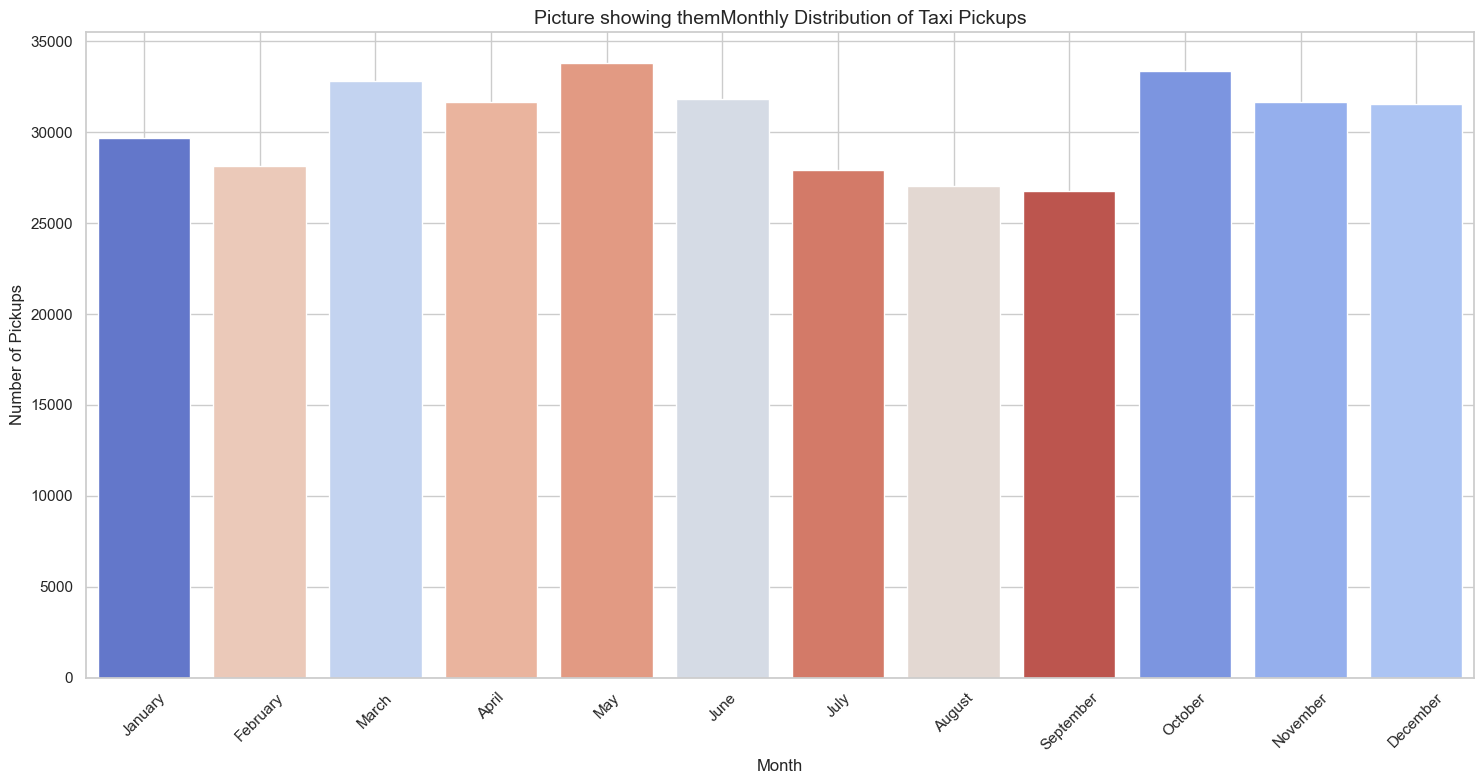

In [37]:
# Show the monthly trends in pickups

##3 A.. Firstly Define the month order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# First Set Seaborn style
sns.set(style="whitegrid")

# Plotting it
plt.figure(figsize=(15, 8))
sns.countplot(
    data=df,
    x='pickup_month_name',
    hue='pickup_month_name',              
    order=months_order,
    palette='coolwarm',
    legend=False                       
)

# Style and labels
plt.title('Picture showing themMonthly Distribution of Taxi Pickups', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [38]:
# Analyse the above parameters

### A,.. Listing  of  the relevant financial columns

financial_colsm = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Now Check for zero or negative values
(df[financial_colsm] <= 0).sum()

fare_amount        103
tip_amount       81700
total_amount        46
trip_distance     4513
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [39]:
# Create a df with non zero entries for the selected parameters.

### A.. Createing  a df with non-zero and the  positive values for financial columns
df_nonzeros = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &  # Noted Tips can be 0 sometimes
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()

### B.. Checking the shape and confirming the filtering

print("The Original rows:", df.shape[0])
print("Final After removing zero/negative financials:", df_nonzeros.shape[0])

The Original rows: 366294
Final After removing zero/negative financials: 361722


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

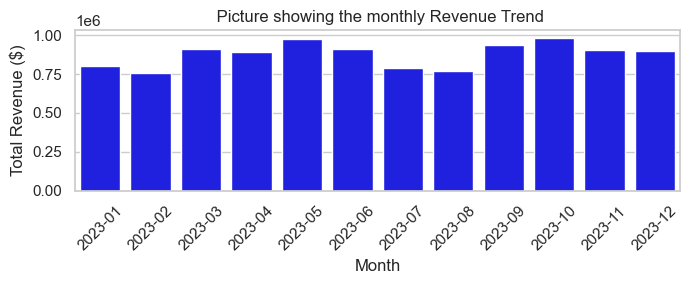

In [44]:
# Group data by month and analyse monthly revenue

### A..Cleaning  the data by removing the invalid fare, distance, and total amount values present
df_cleaneds = df[
    (df['fare_amount'] > 0) &
    (df['trip_distance'] > 0) &
    (df['total_amount'] > 0)
].copy()

df_cleaneds['tpep_pickup_datetime'] = pd.to_datetime(df_cleaneds['tpep_pickup_datetime'])


### B.. First Creating a Month column
df_cleaneds['Month'] = df_cleaneds['tpep_pickup_datetime'].dt.to_period('M').astype(str)

### C..Calculating the  total monthly revenue generated
monthly_revenues = df_cleaneds.groupby('Month')['total_amount'].sum()

### plotting the Monthly Revenue Trend

##Create DataFrame for plotting
monthly_df = pd.DataFrame({
    'Month': monthly_revenues.index,
    'Revenue': monthly_revenues.values
})

### D..Plot the bar chart for it
plt.figure(figsize=(7, 3))
sns.barplot(data=monthly_df, x='Month', y='Revenue', color='Blue')  


plt.title(' Picture showing the monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [45]:
# Calculate proportion of each quarter

### A..Filter and copy it
df_nonzero = df[df['total_amount'] > 0].copy()

### B.. CreatING  quarter column
df_nonzero['pickup_quarter'] = df_nonzero['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

#### C..Now Group by quarter and calculate revenue
quarterly_revenue = df_nonzero.groupby('pickup_quarter')['total_amount'].sum()

# Than Calculate revenue proportion
revenue_proportion = quarterly_revenue / quarterly_revenue.sum()

# S Print result
print(revenue_proportion)

pickup_quarter
2023Q1    0.234074
2023Q2    0.263953
2023Q3    0.237720
2023Q4    0.264252
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

The Correlation between trip distance and fare amount: 0.069


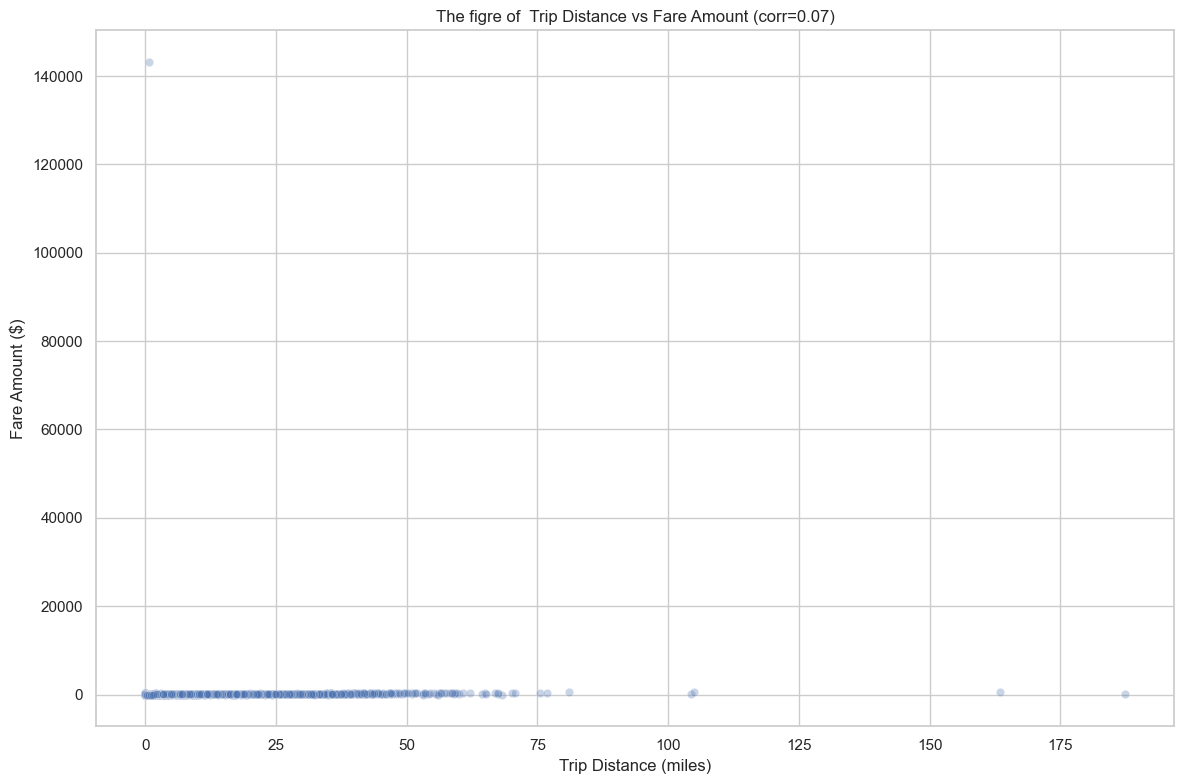

In [46]:
# Show how trip fare is affected by distance

##3 A.. Correlation value IS 
correlation = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])
print("The Correlation between trip distance and fare amount:", round(correlation, 3))


### B.. Showing  the Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_nonzero, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title(f'The figre of  Trip Distance vs Fare Amount (corr={round(correlation, 2)})')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

 The Correlation between fare_amount and trip_duration: 0.02


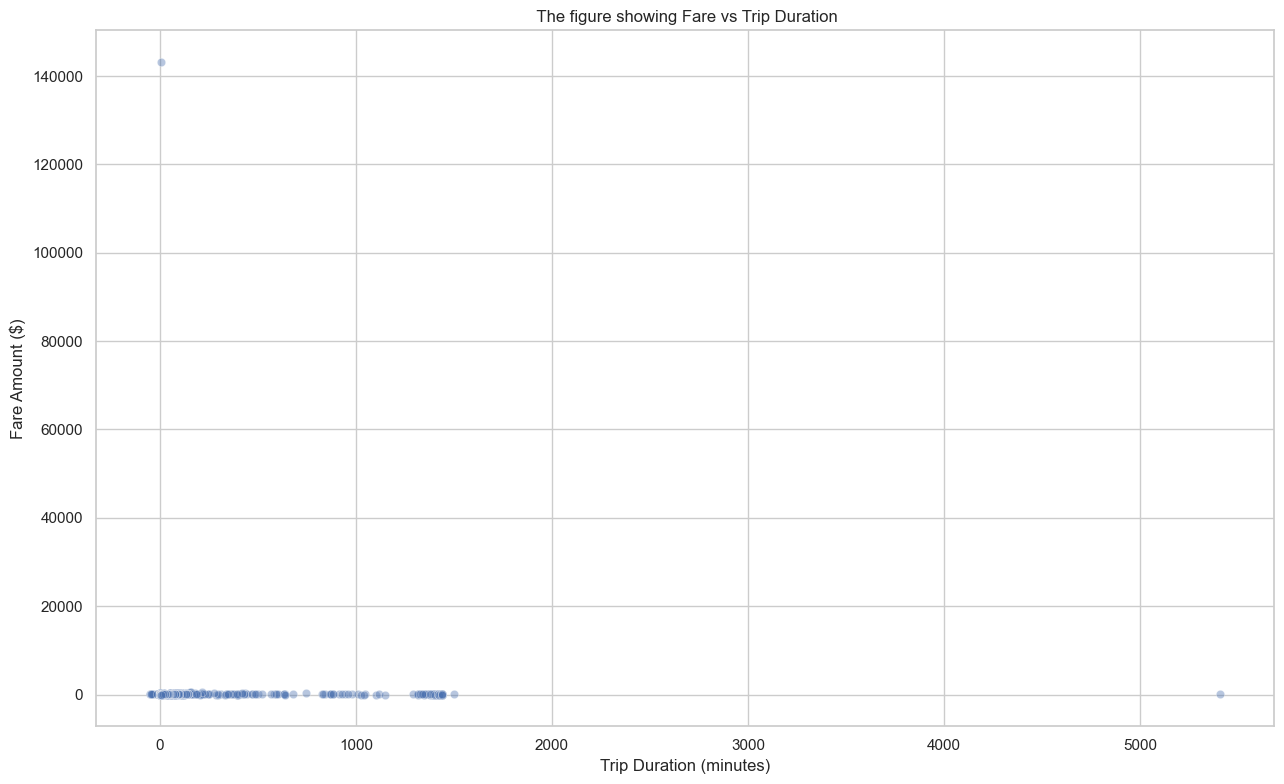

In [47]:
# Show relationship between fare and trip duration

### A.. both datetime columns are parsed as datetime64[ns]
df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'], errors='coerce')
df_nonzero['tpep_dropoff_datetime'] = pd.to_datetime(df_nonzero['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60


### Showing  Fare vs Trip Duration

# Correlation
corr = df_nonzero['fare_amount'].corr(df_nonzero['trip_duration'])
print(f" The Correlation between fare_amount and trip_duration: {corr:.2f}")

#  Now Scatter plot
plt.figure(figsize=(13, 8))
sns.scatterplot(data=df_nonzero, x='trip_duration', y='fare_amount', alpha=0.4)
plt.title(' The figure showing Fare vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Fare vs Passenger Count Correlation: 0.003


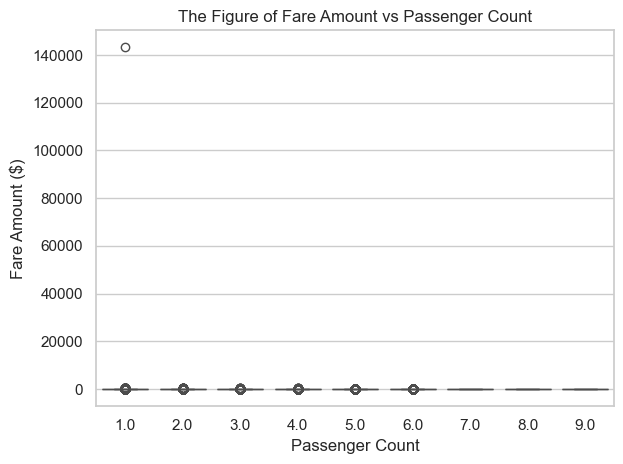

In [48]:
# Show relationship between fare and number of passengers

corr2 = df_nonzero['fare_amount'].corr(df_nonzero['passenger_count'])
print("Fare vs Passenger Count Correlation:", round(corr2, 3))

sns.boxplot(data=df_nonzero, x='passenger_count', y='fare_amount')
plt.title('The Figure of Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.tight_layout()
plt.show()

 The Tip vs Trip Distance Correlation: 0.573


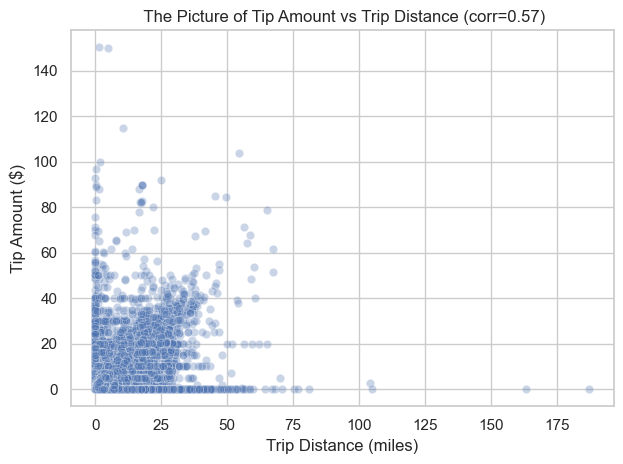

In [49]:
# Show relationship between tip and trip distance
corr3 = df_nonzero['tip_amount'].corr(df_nonzero['trip_distance'])
print(" The Tip vs Trip Distance Correlation:", round(corr3, 3))

sns.scatterplot(data=df_nonzero, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title(f' The Picture of Tip Amount vs Trip Distance (corr={round(corr3, 2)})')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

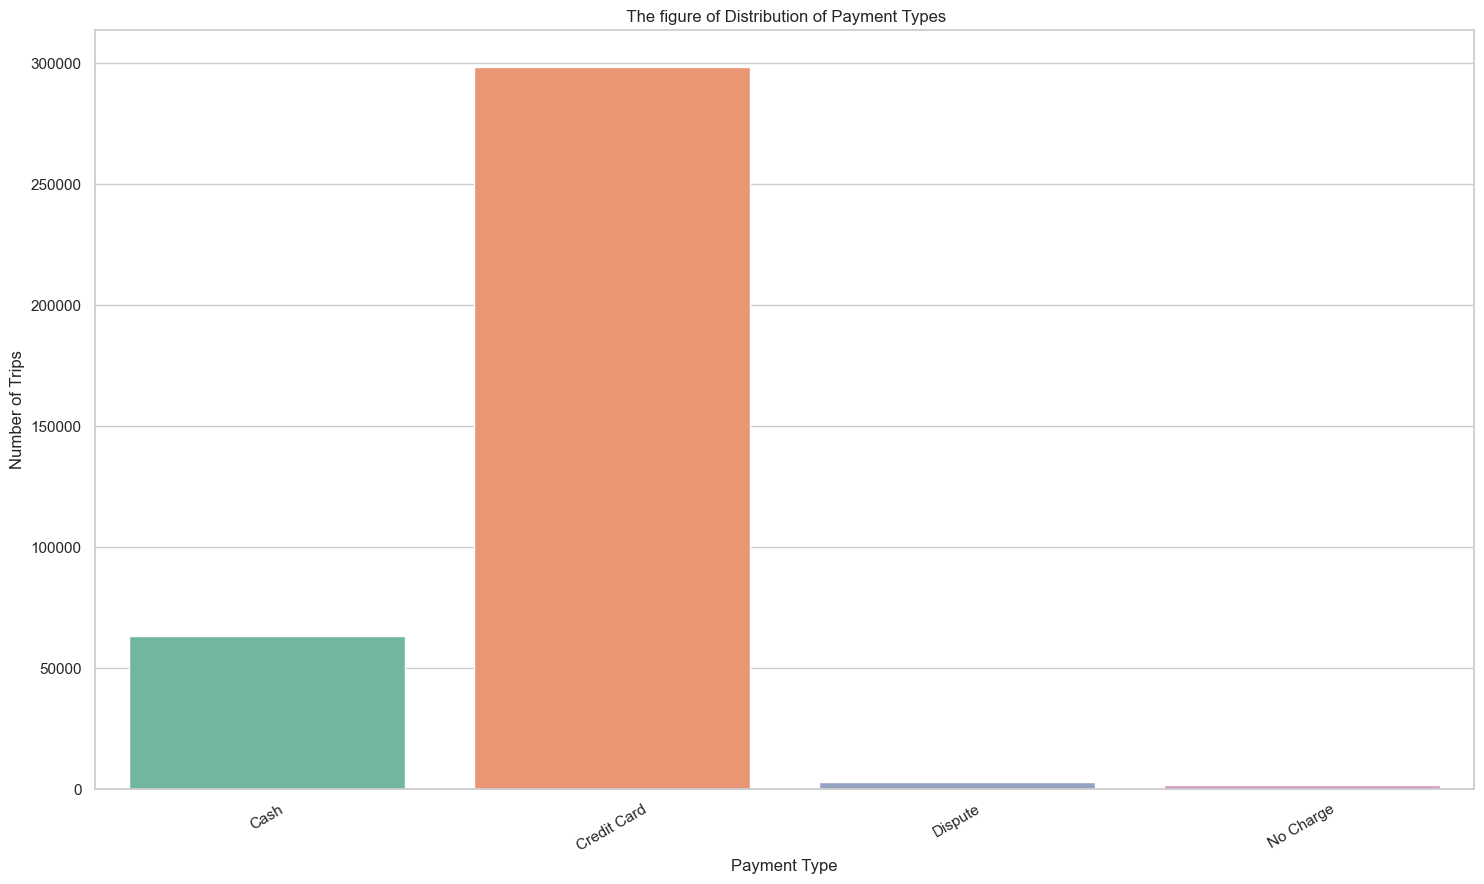

In [50]:
# Analyse the distribution of different payment types (payment_type).

### A.. Preparation of thePayment type mapping
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

### B.. Mapping the  numeric payment types to strings
df_nonzero['payment_type_str'] = df_nonzero['payment_type'].map(payment_mapping)

### C.. Plotting the  distribution preparation
plt.figure(figsize=(15, 9))
sns.countplot(data=df_nonzero, x='payment_type_str', hue='payment_type_str', palette='Set2', legend=False)
plt.title(' The figure of Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [51]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [52]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Documents\NYC_TAXI_EDA\Datasets and Dictionary\taxi_zones\taxi_zones.shp") 

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


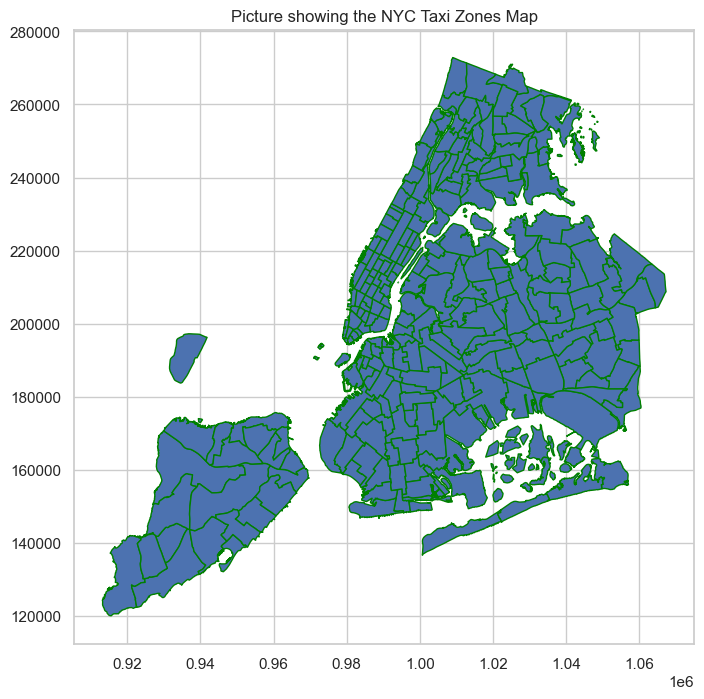

In [54]:
# print(zones.info())
print(zones.info())

# zones.plot()
zones.plot(figsize=(8, 8), edgecolor='green')
plt.title("Picture showing the NYC Taxi Zones Map")
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [55]:
# Merge zones and trip records using locationID and PULocationID

### A.. RenamING  the 'LocationID' column in zones to 'PULocationID' so we can merge it with the trip data
zones_renameds = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge trip records with zones based on PULocationID
df_with_zones = df.merge(zones_renameds[['PULocationID', 'zone', 'borough']], on='PULocationID', how='left')

# View merged data
df_with_zones[['PULocationID', 'zone', 'borough']].head()

PULocationID                       zone    borough
0           138          LaGuardia Airport     Queens
1           161             Midtown Center  Manhattan
2           237      Upper East Side South  Manhattan
3           143        Lincoln Square West  Manhattan
4           246  West Chelsea/Hudson Yards  Manhattan

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [56]:
# Group data by location and calculate the number of trips

### A.. Grouping the  data by PULocationID and count the number of trips
trip_countss = df_with_zones.groupby('PULocationID').size().reset_index(name='num_trips')

# Preview trip counts
trip_countss.head()

PULocationID  num_trips
0             1         52
1             3         12
2             4        359
3             5          3
4             6          4

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [57]:
# Merge trip counts back to the zones GeoDataFrame

### A.. MergING the number of trips into the zones GeoDataFrame
zones_with_tripss = zones.merge(trip_countss, how='left', left_on='LocationID', right_on='PULocationID')

##3 B..Replaceing the  NaNs in num_trips with 0 (zones with no pickups in the sample)
zones_with_tripss['num_trips'] = zones_with_tripss['num_trips'].fillna(0).astype(int)

# the updated GeoDataFrame
zones_with_tripss[['LocationID', 'zone', 'num_trips']].head()

LocationID                     zone  num_trips
0           1           Newark Airport         52
1           2              Jamaica Bay          0
2           3  Allerton/Pelham Gardens         12
3           4            Alphabet City        359
4           5            Arden Heights          3

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

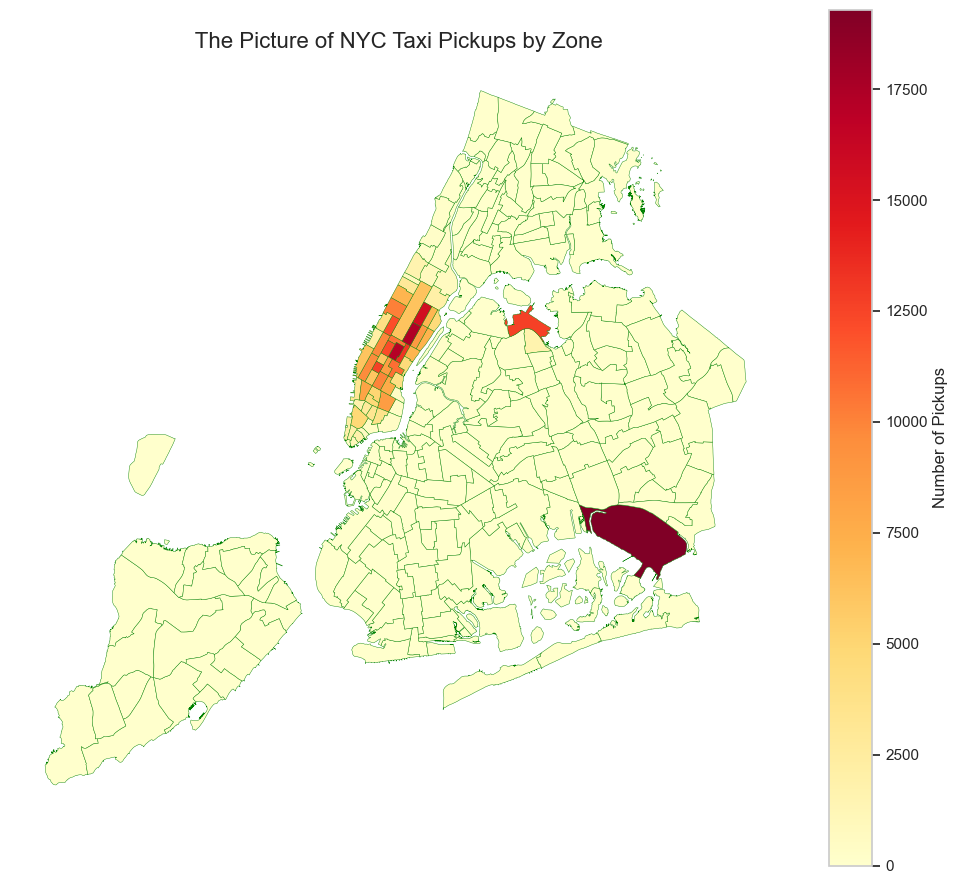

In [58]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(10, 9))

### A.. Plotting  the zones with number of trips color-coded
zones_with_tripss.plot(
    column='num_trips',           
    ax=ax,                       
    legend=True,                  
    cmap='YlOrRd',               
    legend_kwds={
        'label': "Number of Pickups",
        'orientation': "vertical"
    },
    edgecolor='green',            
    linewidth=0.3
)

### B..  Adding the  title
ax.set_title(" The Picture of NYC Taxi Pickups by Zone", fontsize=16)
ax.axis('off')


# Plot the map and display it
plt.tight_layout()
plt.show()

In [59]:
# can you try displaying the zones DF sorted by the number of trips?

### A..The top 10 busiest pickup zones
top_pickup_zones = zones_with_tripss.sort_values(by='num_trips', ascending=False)[['zone', 'borough', 'num_trips']].head(10)
print("The Top 10 Pickup Zones by Number of Trips:")
print(top_pickup_zones)

The Top 10 Pickup Zones by Number of Trips:
                             zone    borough  num_trips
131                   JFK Airport     Queens      19284
236         Upper East Side South  Manhattan      17358
160                Midtown Center  Manhattan      17143
235         Upper East Side North  Manhattan      15527
161                  Midtown East  Manhattan      13238
137             LaGuardia Airport     Queens      12703
185  Penn Station/Madison Sq West  Manhattan      12667
229     Times Sq/Theatre District  Manhattan      12166
141           Lincoln Square East  Manhattan      12080
169                   Murray Hill  Manhattan      10846


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [60]:
# Find routes which have the slowest speeds at different times of the day

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

### A./ Calculating the trip duration in minutes
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
valid_tripss = df[(df['trip_duration_minutes'] > 0) & (df['trip_distance'] > 0)].copy()
valid_tripss['pickup_hour'] = valid_tripss['tpep_pickup_datetime'].dt.hour

### B.. GroupING  by pickup-dropoff pair and hour, then calculate average metrics
route_speed = valid_tripss.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_duration_min=('trip_duration_minutes', 'mean'),
    avg_distance_mi=('trip_distance', 'mean'),
    num_trips=('trip_distance', 'count')
).reset_index()

### C.. average speed in miles per hour
route_speed['avg_speed_mph'] = route_speed['avg_distance_mi'] / (route_speed['avg_duration_min'] / 60)

### D.. Displaying  the  Results 10 slowest routes
slowest_routes = route_speed.sort_values(by='avg_speed_mph').head(10)
print(slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph', 'num_trips']])

       PULocationID  DOLocationID  pickup_hour  avg_speed_mph  num_trips
51141           226           145           18       0.026569          2
66157           260           129           17       0.040746          1
69454           264           237           15       0.043036          1
19414           113           235           22       0.048105          1
6037             50            43            8       0.059525          1
35675           148            45           23       0.066307          2
25723           134           265           15       0.073831          1
18821           113           113           13       0.074370          6
13817            88           144            0       0.074923          1
9276             70           138            6       0.085750          1


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

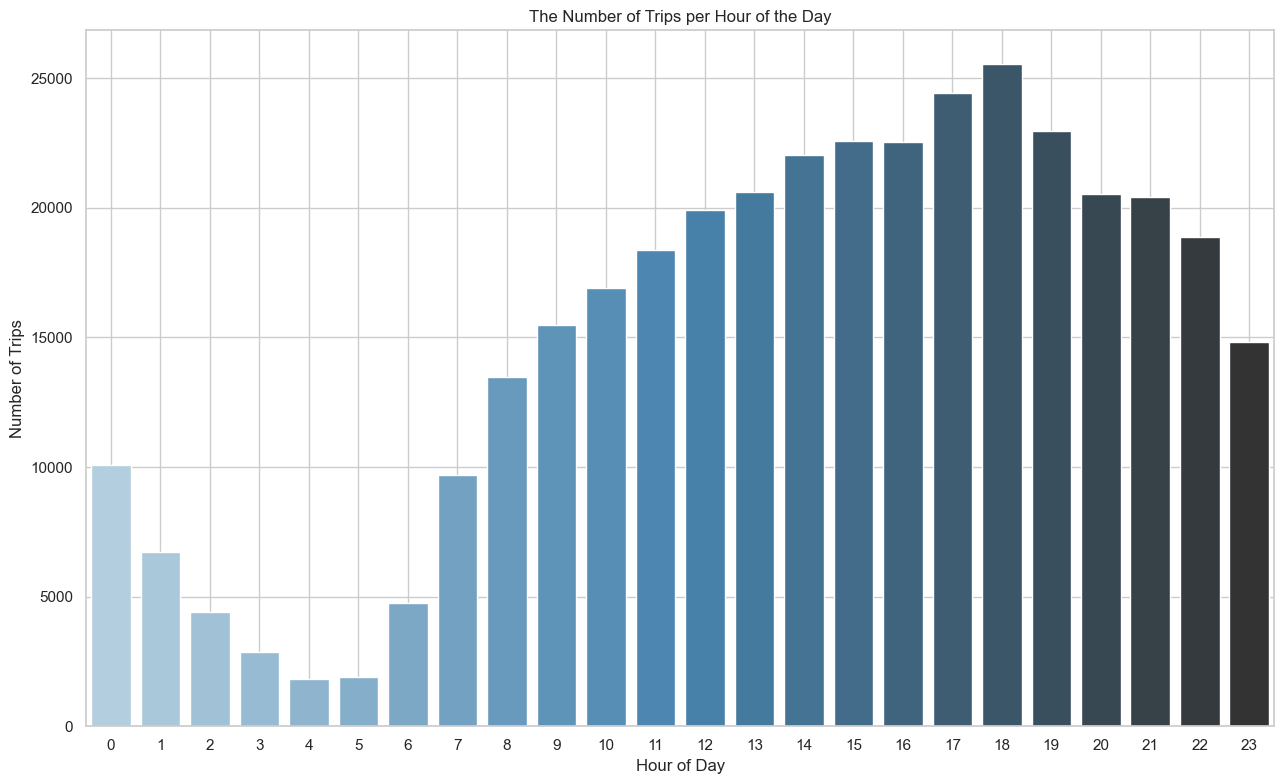

The  Busiest Hour: 18:00 with 25563 trips


In [67]:
# Visualise the number of trips per hour and find the busiest hour

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

### A.. Filtering out valid trips and copy
valid_tripss = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()
valid_tripss['pickup_hour'] = valid_tripss['tpep_pickup_datetime'].dt.hour

### B.. Counting  trips per hour and plot

hourly_trip_countss = valid_tripss['pickup_hour'].value_counts().sort_index().reset_index()
hourly_trip_countss.columns = ['pickup_hour', 'trip_count']
plt.figure(figsize=(13, 8))
sns.barplot(data=hourly_trip_countss, x='pickup_hour', y='trip_count',
            hue='pickup_hour', palette='Blues_d', legend=False)
plt.title('The Number of Trips per Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()

### C.. The Busiest hour

busiest = hourly_trip_countss.loc[hourly_trip_countss['trip_count'].idxmax()]
print(f"The  Busiest Hour: {busiest['pickup_hour']}:00 with {busiest['trip_count']} trips")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [68]:
# Scale up the number of trips

# Define the sampling fraction used during data preparation
sample_fraction = 0.01  # Replace if you used a different sampling rate

### A... Sorting by trip count to find top 5 busiest hours
top5_busiest = hourly_trip_countss.sort_values(by='trip_count', ascending=False).head(5)

### B.. Scaling up the counts
top5_busiest['estimated_actual_trips'] = (top5_busiest['trip_count'] / sample_fraction).astype(int)
print("The  Estimated Actual Number of Trips in the 5 Busiest Hours is:")
for _, row in top5_busiest.iterrows():
    print(f"{int(row['pickup_hour']):02d}:00 - {row['estimated_actual_trips']:,} trips")
    
# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.01

The  Estimated Actual Number of Trips in the 5 Busiest Hours is:
18:00 - 2,556,300 trips
17:00 - 2,442,800 trips
19:00 - 2,296,500 trips
15:00 - 2,257,200 trips
16:00 - 2,253,900 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

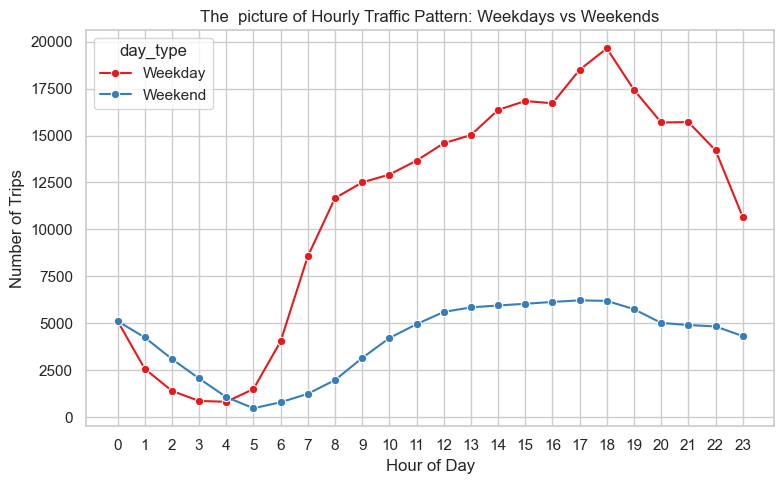

In [70]:
# Compare traffic trends for the week days and weekends

### A.. Creating  a new column classifying each day as Weekday or Weekend
df['day_type'] = df['pickup_day_name'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
hourly_daytype_countss = df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

### B.. Plotting the  Figures
plt.figure(figsize=(8, 5))
sns.lineplot(data=hourly_daytype_countss, x='pickup_hour', y='trip_count', hue='day_type', marker='o', palette='Set1')
plt.title('The  picture of Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [73]:
# Find top 10 pickup and dropoff zones

### A..shapefile is loaded

zones = gpd.read_file(r"C:\Documents\NYC_TAXI_EDA\Datasets and Dictionary\taxi_zones")

location_id_to_zone = dict(zip(zones['LocationID'], zones['zone']))
                      
                      

### B.. Map LocationID to Zone names
                      
df['pickup_zone'] = df['PULocationID'].map(location_id_to_zone)
df['dropoff_zone'] = df['DOLocationID'].map(location_id_to_zone)

### C..Count pickups and dropoffs by zone
                      
top_pickup_zoness = df.groupby('pickup_zone').size().sort_values(ascending=False).head(10).index.tolist()
top_dropoff_zoness = df.groupby('dropoff_zone').size().sort_values(ascending=False).head(10).index.tolist()

### D.. top zones
df_top_pickups = df[df['pickup_zone'].isin(top_pickup_zoness)]
df_top_dropoffs = df[df['dropoff_zone'].isin(top_dropoff_zoness)]

###  E.. 10 pickup zones
top_pickup_zoness = df['pickup_zone'].value_counts().head(10)
print("The figure of Top 10 Pickup Zones:")
print(top_pickup_zoness)

print("\n" + "-"*50 + "\n")

# Find top 10 dropoff zones
top_dropoff_zoness = df['dropoff_zone'].value_counts().head(10)
print("The Top 10 Dropoff Zones:")
print(top_dropoff_zoness)

The figure of Top 10 Pickup Zones:
pickup_zone
JFK Airport                     19284
Upper East Side South           17358
Midtown Center                  17143
Upper East Side North           15527
Midtown East                    13238
LaGuardia Airport               12703
Penn Station/Madison Sq West    12667
Times Sq/Theatre District       12166
Lincoln Square East             12080
Murray Hill                     10846
Name: count, dtype: int64

--------------------------------------------------

The Top 10 Dropoff Zones:
dropoff_zone
Upper East Side North        16313
Upper East Side South        15530
Midtown Center               14321
Times Sq/Theatre District    11148
Murray Hill                  10910
Midtown East                 10446
Lincoln Square East          10371
Upper West Side South        10172
Lenox Hill West               9604
East Chelsea                  9325
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [74]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

### A.. Combining  into one DataFrame
pickup_dropoff_ratio_dfs = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)


pickup_dropoff_ratio_dfs['pickup_dropoff_ratio'] = pickup_dropoff_ratio_dfs['pickup_count'] / pickup_dropoff_ratio_dfs['dropoff_count'].replace(0, np.nan)

### B.. Adding zone names by merging with `zones` GeoDataFrame
pickup_dropoff_ratio_dfs = pickup_dropoff_ratio_dfs.merge(
    zones[['LocationID', 'zone']],
    left_index=True, right_on='LocationID', how='left'
)

### C.. Sorting and select top/bottom zones
top_ratios = pickup_dropoff_ratio_dfs.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_ratios = pickup_dropoff_ratio_dfs.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("The Top 10 zones by Pickup/Dropoff Ratio is:")
print(top_ratios[['zone', 'pickup_dropoff_ratio']])

print("\n The Bottom 10 zones by Pickup/Dropoff Ratio is:")
print(bottom_ratios[['zone', 'pickup_dropoff_ratio']])

The Top 10 zones by Pickup/Dropoff Ratio is:
                               zone  pickup_dropoff_ratio
69.0                  East Elmhurst              7.905213
131.0                   JFK Airport              4.673776
137.0             LaGuardia Airport              2.912196
185.0  Penn Station/Madison Sq West              1.548722
42.0                   Central Park              1.388951
248.0                  West Village              1.354015
113.0       Greenwich Village South              1.347032
161.0                  Midtown East              1.267279
160.0                Midtown Center              1.197053
233.0                      Union Sq              1.185286

 The Bottom 10 zones by Pickup/Dropoff Ratio is:
                                      zone  pickup_dropoff_ratio
98.0                       Freshkills Park                   0.0
114.0                  Grymes Hill/Clifton                   0.0
57.0                          Country Club                   0.0
205.0  

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [76]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones


### A.. Filter for night hours (11 PM to 5 AM)
night_dfs = df_cleaneds[(df_cleaneds['pickup_hour'] >= 23) | (df_cleaneds['pickup_hour'] <= 5)]

pickup_counts = night_dfs['PULocationID'].value_counts().head(10)
dropoff_counts = night_dfs['DOLocationID'].value_counts().head(10)

### B.. Converting to DataFrames and rename columns
top_night_pickups = pickup_counts.reset_index()
top_night_pickups.columns = ['PULocationID', 'Pickup_Count']

top_night_dropoffs = dropoff_counts.reset_index()
top_night_dropoffs.columns = ['DOLocationID', 'Dropoff_Count']
top_night_pickups_named = top_night_pickups.merge(
    zones[['LocationID', 'zone']], how='left', left_on='PULocationID', right_on='LocationID'
)

top_night_dropoffs_named = top_night_dropoffs.merge(
    zones[['LocationID', 'zone']], how='left', left_on='DOLocationID', right_on='LocationID'
)

# Note that the top zones should be of night hours and not the overall top zones

### C.. Displaying  the Results
print("Top 10 Night Pickup Zones (11 PM - 5 AM) is :")
display(top_night_pickups_named[['zone', 'Pickup_Count']])

print("\n Top 10 Night Dropoff Zones (11 PM - 5 AM) is :")
display(top_night_dropoffs_named[['zone', 'Dropoff_Count']])

Top 10 Night Pickup Zones (11 PM - 5 AM) is :


zone  Pickup_Count
0                  East Village          3063
1                   JFK Airport          2861
2                  West Village          2530
3                  Clinton East          2033
4               Lower East Side          1916
5     Times Sq/Theatre District          1699
6       Greenwich Village South          1677
7  Penn Station/Madison Sq West          1379
8             LaGuardia Airport          1238
9                 Midtown South          1203


 Top 10 Night Dropoff Zones (11 PM - 5 AM) is :


zone  Dropoff_Count
0                   East Village           1688
1                   Clinton East           1419
2                    Murray Hill           1279
3                       Gramercy           1170
4                   East Chelsea           1144
5                Lenox Hill West           1063
6                 Yorkville West           1009
7                   West Village            920
8  Sutton Place/Turtle Bay North            884
9          Upper East Side North            873

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [77]:
# Filter for night hours (11 PM to 5 AM)

night_hours = (df_cleaneds['pickup_hour'] >= 23) | (df_cleaneds['pickup_hour'] <= 5)

### A..  Filter data
night_revenue = df_cleaneds[night_hours]['total_amount'].sum()
total_revenue = df_cleaneds['total_amount'].sum()

### B.. Calculating revenue shares
night_share = (night_revenue / total_revenue) * 100

# Step 4: Print results
print(f" The Nighttime (11 PM - 5 AM) is : {night_share:.2f}%")

 The Nighttime (11 PM - 5 AM) is : 11.87%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [82]:
# Analyse the fare per mile per passenger for different passenger counts

valid_fare_df = df_cleaneds[
    (df_cleaneds['trip_distance'] > 0) & 
    (df_cleaneds['passenger_count'] > 0)
].copy()

### A.. Computing the  fare per mile per passenger
valid_fare_df['fare_per_mile_per_passenger'] = (
    valid_fare_df['fare_amount'] / (valid_fare_df['trip_distance'] * valid_fare_df['passenger_count'])
)

### B.. Group by passenger count and calculate average
avg_fare_per_mile_passenger = valid_fare_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

##3 C.. Rename columns
avg_fare_per_mile_passenger.columns = ['Passenger Count', 'Avg Fare per Mile per Passenger']

print("The Average Fare per Mile per Passenger (by Passenger Count) is :")
display(avg_fare_per_mile_passenger)

The Average Fare per Mile per Passenger (by Passenger Count) is :


Passenger Count  Avg Fare per Mile per Passenger
0              1.0                        11.398355
1              2.0                         6.391498
2              3.0                         4.255027
3              4.0                         4.746516
4              5.0                         1.570459
5              6.0                         1.289554
6              8.0                         0.350442
7              9.0                         0.595593

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

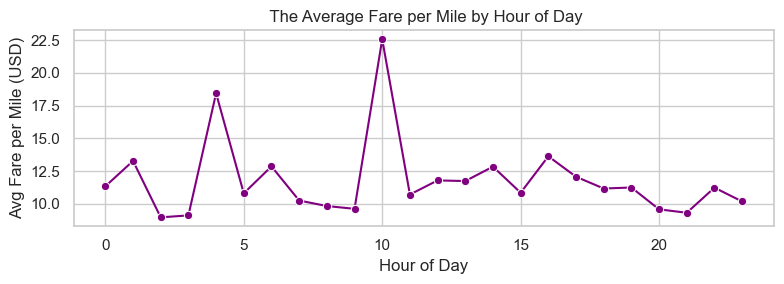

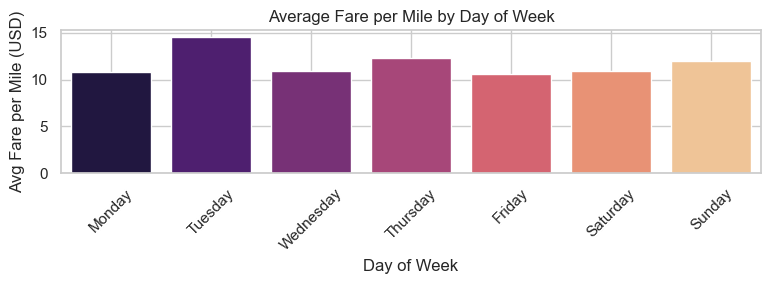

In [81]:
9# Compare the average fare per mile for different days and for different times of the day

valid_df = df_cleaneds[(df_cleaneds['trip_distance'] > 0) & (df_cleaneds['fare_amount'] > 0)].copy()
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']
hourly_fare_per_mile = valid_df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
daily_fare_per_mile = valid_df.groupby('pickup_day_name')['fare_per_mile'].mean().reset_index()

### A.. Sorting days in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_fare_per_mile['pickup_day_name'] = pd.Categorical(daily_fare_per_mile['pickup_day_name'], categories=days_order, ordered=True)
daily_fare_per_mile.sort_values('pickup_day_name', inplace=True)

### B.. Visualizing the average fare per mile by hour
plt.figure(figsize=(8, 3))
sns.lineplot(data=hourly_fare_per_mile, x='pickup_hour', y='fare_per_mile', marker='o', color='purple')
plt.title(' The Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare per Mile (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### C.. Now Visualizing  average fare per mile by day of week
plt.figure(figsize=(8, 3))
sns.barplot(
    data=daily_fare_per_mile,
    x='pickup_day_name',
    y='fare_per_mile',
    hue='pickup_day_name',             
    legend=False,                       
    palette='magma'
)
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Fare per Mile (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

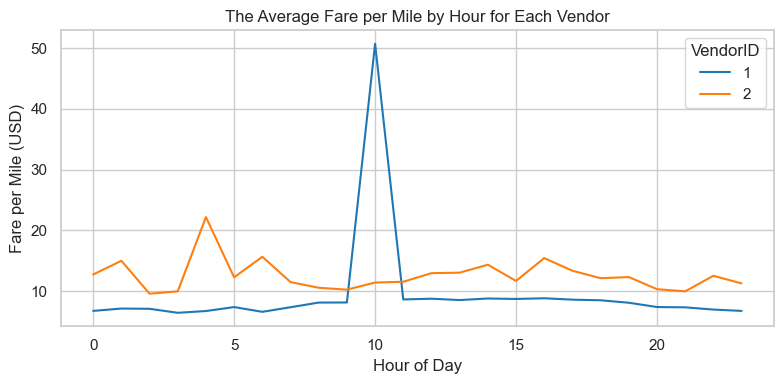

In [83]:
# Compare fare per mile for different vendors


### A.. Providing aline chart comparing the hourly fare efficiency per mile of different vendors (VendorID 1 vs 2)
vendor_dfs = df_cleaneds[df_cleaneds['trip_distance'] > 0].copy()

vendor_dfs['fare_per_mile'] = vendor_dfs['fare_amount'] / vendor_dfs['trip_distance']
fare_by_vendor_hour = vendor_dfs.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

### B.. Plotting the average fare per mile by hour for each vendor
plt.figure(figsize=(8, 4))
sns.lineplot(data=fare_by_vendor_hour, x='pickup_hour', y='fare_per_mile', hue='VendorID', palette='tab10')
plt.title('The Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


The Average Fare per Mile by Vendor and Distance Tier is:


Vendor ID Distance Tier  Avg Fare per Mile
0          1     0–2 miles          13.532020
1          1     2–5 miles           6.378918
2          1      5+ miles           4.415992
3          2     0–2 miles          17.657557
4          2     2–5 miles           6.546002
5          2      5+ miles           4.498579

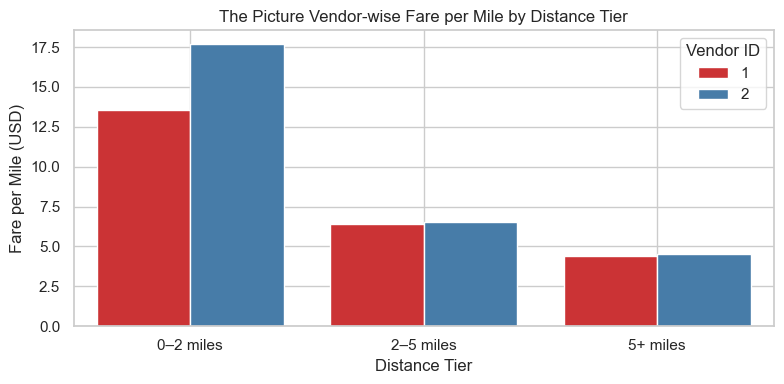

In [86]:
# Defining distance tiers

tier_dfs = df_cleaneds[
    (df_cleaneds['fare_amount'] > 0) &
    (df_cleaneds['trip_distance'] > 0)
].copy()

### A.. Creating distance tier column
def classify_distance(dist):
    if dist <= 2:
        return '0–2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

tier_dfs['distance_tier'] = tier_dfs['trip_distance'].apply(classify_distance)
tier_dfs['fare_per_mile'] = tier_dfs['fare_amount'] / tier_dfs['trip_distance']
tiered_vendor_faress = (
    tier_dfs.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values(by=['VendorID', 'distance_tier'])
)

### B.. Renameing  it  for clarity
tiered_vendor_faress.columns = ['Vendor ID', 'Distance Tier', 'Avg Fare per Mile']

print("The Average Fare per Mile by Vendor and Distance Tier is:")
display(tiered_vendor_faress)
plt.figure(figsize=(8, 4))
sns.barplot(
    data=tiered_vendor_faress,
    x='Distance Tier',
    y='Avg Fare per Mile',
    hue='Vendor ID',
    palette='Set1'
)
plt.title('The Picture Vendor-wise Fare per Mile by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

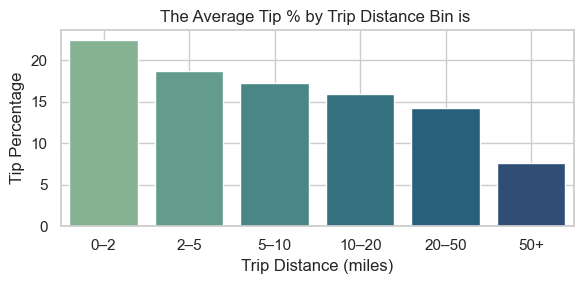

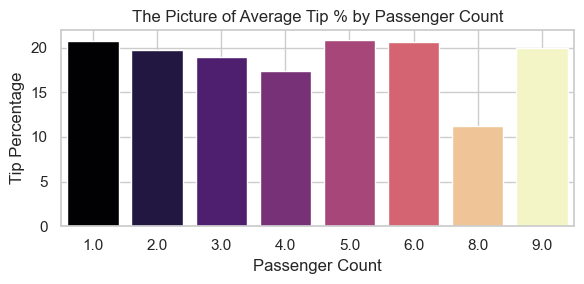

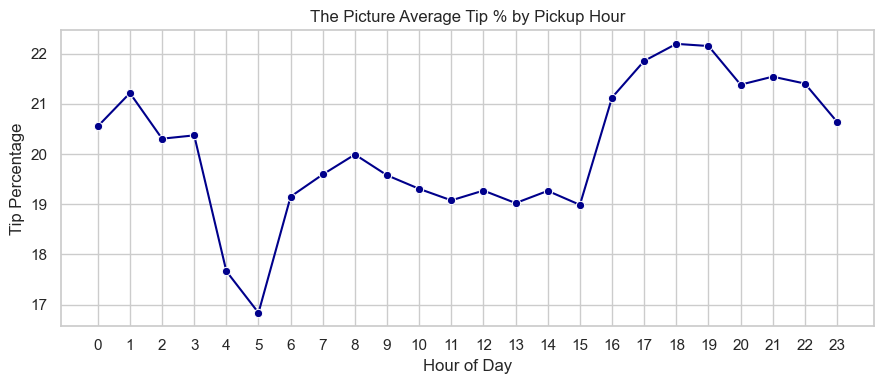

In [90]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_cleaneds = df_cleaneds[df_cleaneds['fare_amount'] > 0].copy()

### A.. Creating the tip percentage column
df_cleaneds['tip_percent'] = (df_cleaneds['tip_amount'] / df_cleaneds['fare_amount']) * 100


### B...The Tip Percentage by Trip Distance 
distance_bins = [0, 2, 5, 10, 20, 50, df_cleaneds['trip_distance'].max()]
distance_labels = ['0–2', '2–5', '5–10', '10–20', '20–50', '50+']
df_cleaneds['distance_bin'] = pd.cut(df_cleaneds['trip_distance'], bins=distance_bins, labels=distance_labels, include_lowest=True)

tip_by_distance = df_cleaneds.groupby('distance_bin', observed=False)['tip_percent'].mean().reset_index()


plt.figure(figsize=(6, 3))
sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percent', hue='distance_bin', legend=False, palette='crest')
plt.title('The Average Tip % by Trip Distance Bin is ')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()


### C..The Tip Percentage by Passenger Count Showing
tip_by_passengers = df_cleaneds.groupby('passenger_count')['tip_percent'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(data=tip_by_passengers, x='passenger_count', y='tip_percent', hue='passenger_count', legend=False, palette='magma')
plt.title('The Picture of Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

### D..Tip Percentage by Pickup Hour
tip_by_hours = df_cleaneds.groupby('pickup_hour')['tip_percent'].mean().reset_index()

plt.figure(figsize=(9, 4))
sns.lineplot(data=tip_by_hours, x='pickup_hour', y='tip_percent', marker='o', color='darkblue')
plt.title('The Picture Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Tip Percentage')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

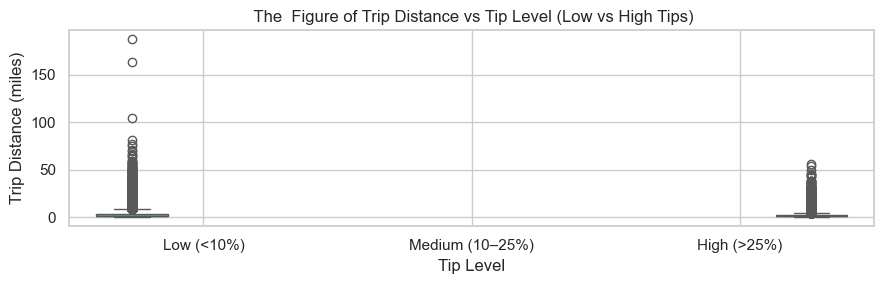

In [92]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_cleaneds['tip_level'] = pd.cut(df_cleaneds['tip_percent'], bins=[-1, 10, 25, 100], labels=['Low (<10%)', 'Medium (10–25%)', 'High (>25%)'])

tip_comparisons = df_cleaneds[df_cleaneds['tip_level'].isin(['Low (<10%)', 'High (>25%)'])]

plt.figure(figsize=(9, 3))
sns.boxplot(data=tip_comparisons, x='tip_level', y='trip_distance', hue='tip_level', palette='Set2', legend=False)
plt.title(' The  Figure of Trip Distance vs Tip Level (Low vs High Tips)')
plt.xlabel('Tip Level')
plt.ylabel('Trip Distance (miles)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

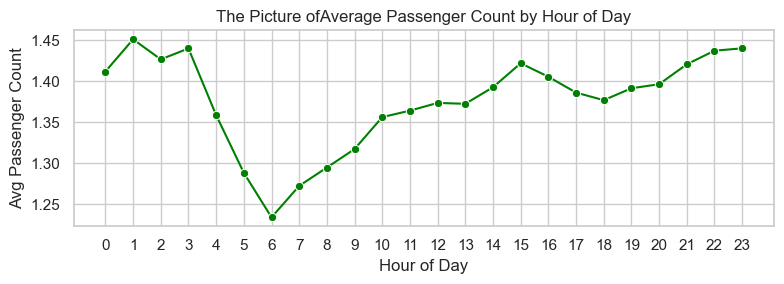

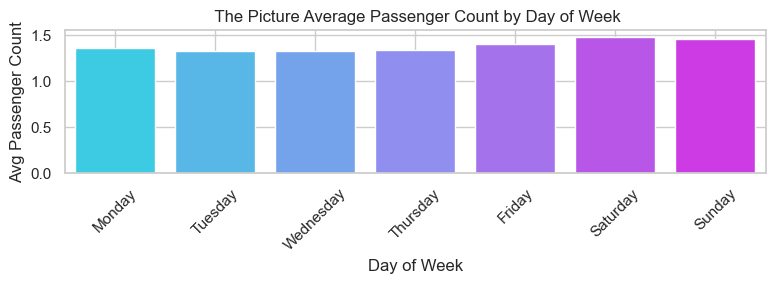

In [94]:
# See how passenger count varies across hours and days

passenger_by_hours = df_cleaneds.groupby('pickup_hour')['passenger_count'].mean().reset_index()

plt.figure(figsize=(8, 3))
sns.lineplot(data=passenger_by_hours, x='pickup_hour', y='passenger_count', marker='o', color='green')
plt.title('The Picture ofAverage Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

### A.. Creating the  average passenger count per day of the week

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cleaneds['pickup_day_name'] = pd.Categorical(df_cleaneds['pickup_day_name'], categories=day_order, ordered=True)

passenger_by_days = df_cleaneds.groupby('pickup_day_name', observed=False)['passenger_count'].mean().reset_index()

plt.figure(figsize=(8, 3))
sns.barplot(data=passenger_by_days, x='pickup_day_name', y='passenger_count', hue='pickup_day_name', palette='cool', legend=False)
plt.title(' The Picture Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [95]:
# How does passenger count vary across zones

### A... Calculating average passenger count per pickup zone
passenger_zone_avgs = df_cleaneds.groupby('PULocationID')['passenger_count'].mean().reset_index()

In [97]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame

passenger_zone_avgs.columns = ['LocationID', 'Avg_Passenger_Count']


### A.. (Assuming 'zones_with_trips' has 'LocationID' and 'zone' columns)
zone_passenger_counts = zones_with_tripss.merge(passenger_zone_avgs, on='LocationID', how='left')
zone_passenger_counts['Avg_Passenger_Count'] = zone_passenger_counts['Avg_Passenger_Count'].fillna(0)
zone_passenger_counts = zone_passenger_counts.copy()


### B..the top 10 zones by average passenger count
top_zones_by_passenger = zone_passenger_counts[['zone', 'Avg_Passenger_Count']].sort_values(
    by='Avg_Passenger_Count', ascending=False).head(10)

print("The Top 10 Zones by Average Passenger Count is:")
display(top_zones_by_passenger)

The Top 10 Zones by Average Passenger Count is:


zone  Avg_Passenger_Count
5    Arrochar/Fort Wadsworth             2.250000
252            Willets Point             2.000000
227         Sunset Park West             1.916667
194                 Red Hook             1.900000
0             Newark Airport             1.875000
156                  Maspeth             1.818182
11              Battery Park             1.714286
66             Dyker Heights             1.666667
193          Randalls Island             1.666667
56                    Corona             1.608696

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [99]:
# How often is each surcharge applied?

###A.... Re-mapping the  extra charges to descriptive labels as
surcharge_labels = {
    0.0: 'No Surcharge',
    0.5: 'Night Surcharge ($0.5)',
    1.0: 'Peak Hour ($1.0)',
    1.25: 'Peak Hour ($1.25)',
    2.5: 'JFK Airport Fee',
    3.0: 'Unknown/Other'
}

df_cleaneds['surcharge_type'] = df_cleaneds['extra'].map(surcharge_labels)
surcharge_summarys = df_cleaneds['surcharge_type'].value_counts().reset_index()
surcharge_summarys.columns = ['Surcharge Type', 'Count']
surcharge_summarys['Percentage (%)'] = (surcharge_summarys['Count'] / len(df_cleaneds) * 100).round(2)

print(" The Summary of Surcharge Types is:")
display(surcharge_summarys)

 The Summary of Surcharge Types is:


Surcharge Type   Count  Percentage (%)
0            No Surcharge  136584           37.76
1         JFK Airport Fee   92362           25.53
2        Peak Hour ($1.0)   71854           19.86
3       Peak Hour ($1.25)     285            0.08
4  Night Surcharge ($0.5)       2            0.00
5           Unknown/Other       2            0.00

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

##### For optimizing the NYC taxi operations, need to deploy more taxis in high-demand zones like JFK Airport, Midtown, and LaGuardia as it  can help reduce passenger wait times. Time-based fleet allocation during peak hours like (7–9 AM and 5–8 PM on weekdays) ensures the better service availability and maximizes revenue generate . 
##### Using adaptive routing powered by real-time traffic data and historical zone efficiency helps in avoiding congested areas and minimizing non-revenue mileage. Along with that, evaluating underperforming zones by identifying operational inefficiencies—such as the  low visibility, poor access, or safety concerns—can guide  the better decisions to either redesign coverage or scale back services.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

#### For  enhancing the cab service efficiency, evidence-based strategies focus on  thealigning cab positioning with real-time and seasonal demand. High-demand zones like JFK, Midtown, and Lower Manhattan should be prioritized during weekday peak hours—residential zones in the morning and business hubs in the evening. the Cab distribution should also adapt to day-of-week patterns, with increased deployment in nightlife and recreational areas like Times Square and Brooklyn during weekend nights, and airports on Sunday evenings.
#### Seasonally,  the warmer months call for placing cabs near tourist attractions like Central Park and Coney Island, while holiday seasons demand coverage near shopping hubs. By Analyzing idle-time zones helps redirect cabs from underperforming areas to active ones using real-time tools. Along with that, targeting short, frequent trip corridors—especially within Manhattan during lunch and late-night hours—can significantly boost trip turnover and revenue.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

#### For  optimizing the  pricing strategies and to  boost revenue while staying competitive, need to take account of several data-driven adjustments are proposed.by  Implementing time-based surge pricing during peak hours (weekday rush and weekend nights) can increase per-trip revenue, while maintaining price caps ensures competitiveness with ride-hailing apps.
#### The  Zone-specific pricing—like flat or premium rates for high-demand zones such as JFK, LaGuardia, and Midtown—can enhance profitability, while discounts or loyalty points can encourage travel to underutilized areas. For  the short-distance, high-frequency urban trips, offering micro-discounts or capped base fares during off-peak hours can increase cab utilization. Various  Dynamic discounts and loyalty programs (e.g., 10th ride free or 20% off off-peak) incentivize repeat travel, especially in low-demand zones. Lastly, since credit card users tend to tip more, offering small discounts for digital payments and promoting app-based bookings with upfront fare and tip options can further streamline service and boost earnings